# NLP Project on PoS Tagging
In this project we aim to apply parts-of-speech tagging on two texts. For this purpose, we will first have to apply preprocessing such as removing runnung words & stop words, minimise all upper case letters, tokenise all the words, etc. We will also be doing analysis and visualization on the texts to get a better understanding and draw inferences.<br>
This code deals with the book The Return of Sherlock Holmes, by Sir Arthur Conan Doyle.

This project is completed by:
- Shivesh Kaundinya - 19UCS154
- Keshav Maheshwari - 19UCS060
- Roshan Kumar - 19UCS178

### Setting Up

In [12]:
import nltk                         # Has necessary modules for PoS Tagging
from nltk.corpus import stopwords   # Contains stop words that need to be removed
from nltk import pos_tag            # Used to perform PoS Tagging

import regex as re                  # Used for matching words in the text
import unidecode                    # To remove Greek accents

from wordcloud import WordCloud     # To generate worcloud
import matplotlib.pyplot as plt     # To display graphs related to data

### Reading the Book

In [13]:
book_name = "The Return of Sherlock Holmes, by Sir Arthur Conan Doyle.txt"
with open(book_name, encoding="utf-8") as book:
    lines = book.readlines()

print(lines[:10])

['\ufeff\n', "Project Gutenberg's The Return of Sherlock Holmes, by Arthur Conan Doyle\n", '\n', 'This eBook is for the use of anyone anywhere at no cost and with\n', 'almost no restrictions whatsoever.  You may copy it, give it away or\n', 're-use it under the terms of the Project Gutenberg License included\n', 'with this eBook or online at www.gutenberg.org\n', '\n', 'Title: The Return of Sherlock Holmes\n', '\n']


### Preprocessing

In [14]:
# Extracting the main content from the text

begin_index = lines.index("THE ADVENTURE OF THE EMPTY HOUSE\n")
end_index = len(lines) - 1 - lines[::-1].index("      THE END\n")
print("The main content is from line numbers {} to {}".format(begin_index, end_index))

lines = lines[begin_index:end_index]        # Reducing lines to main content

The main content is from line numbers 55 to 13427


In [15]:
# Removing chapter headings, part headings and empty lines

chapter_pattern = r"THE ADVENTURE OF [A-Z]+"

temp = []
for line in lines:
    is_valid = ((line == '\n') or re.match(chapter_pattern, line))
    if(not is_valid):               # If the line is neither a chapter name nor an empty line
        temp.append(line)           # include it in the final list

lines = temp
print(lines[:10])


['      It was in the spring of the year 1894 that all London was\n', '      interested, and the fashionable world dismayed, by the murder of\n', '      the Honourable Ronald Adair under most unusual and inexplicable\n', '      circumstances. The public has already learned those particulars\n', '      of the crime which came out in the police investigation, but a\n', '      good deal was suppressed upon that occasion, since the case for\n', '      the prosecution was so overwhelmingly strong that it was not\n', '      necessary to bring forward all the facts. Only now, at the end of\n', '      nearly ten years, am I allowed to supply those missing links\n', '      which make up the whole of that remarkable chain. The crime was\n']


In [16]:
# Combining all the lines into one string

joined_book = ''.join(lines)                            # Combining all the lines to a single string
joined_book = unidecode.unidecode(joined_book)          # Removing Greek accents
joined_book = joined_book.lower()                       # Turing all the characters to lower case
joined_book = re.sub('_', '', joined_book)              # Removing all the '_'
joined_book = re.sub('[\s]+', '_', joined_book)         # Replacing spaces with '_'
joined_book = re.sub(r'\W+', '', joined_book)           # Removing non-alphanumeric characters
joined_book = re.sub('_', ' ', joined_book)             # Replacing '_' back to ' '

print(joined_book[:1000])
text_file = open("B2.txt", "w")

text_file.write(joined_book)

text_file.close()


 it was in the spring of the year 1894 that all london was interested and the fashionable world dismayed by the murder of the honourable ronald adair under most unusual and inexplicable circumstances the public has already learned those particulars of the crime which came out in the police investigation but a good deal was suppressed upon that occasion since the case for the prosecution was so overwhelmingly strong that it was not necessary to bring forward all the facts only now at the end of nearly ten years am i allowed to supply those missing links which make up the whole of that remarkable chain the crime was of interest in itself but that interest was as nothing to me compared to the inconceivable sequel which afforded me the greatest shock and surprise of any event in my adventurous life even now after this long interval i find myself thrilling as i think of it and feeling once more that sudden flood of joy amazement and incredulity which utterly submerged my mind let me say to 

In [17]:
# Tokenising the string

nltk.download('punkt')
tokens = nltk.word_tokenize(joined_book)

print('The text contains {} words'.format(len(tokens)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91941\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The text contains 111974 words


### Analyzing the Text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91941\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


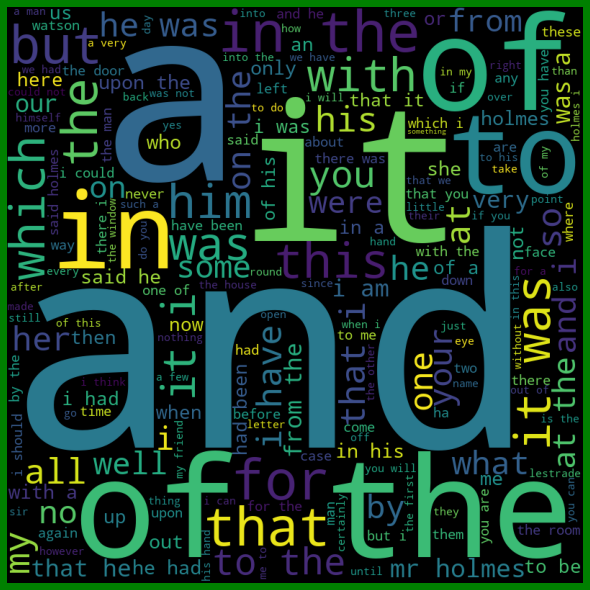

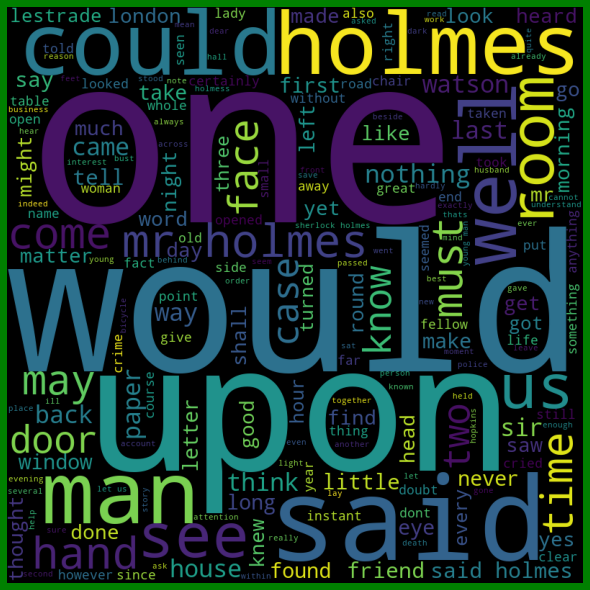

In [18]:
# Visualizing with wordcloud

def show_wordcloud(stopwords):
    wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10, stopwords=stopwords).generate(joined_book)
    plt.figure(figsize=(8, 8), facecolor='green')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

nltk.download('stopwords')
all_stopwords = stopwords.words('english')

show_wordcloud({',', '.', '-', '"'})        # Wordcloud with stopwords
show_wordcloud(all_stopwords)               # Wordcloud without stopwords

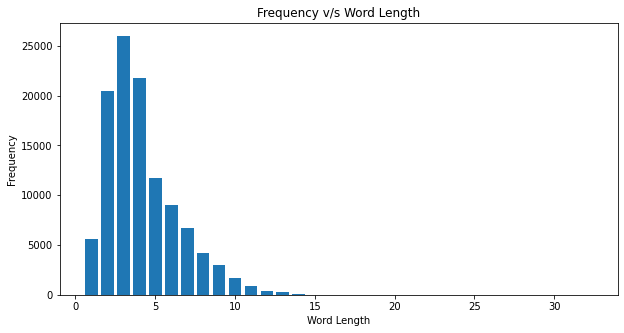

In [19]:
# Analyzing relation between word length and frequency 

wordlen_to_freq = {}

for token in tokens:
    length = len(token)
    if(length in wordlen_to_freq):
        wordlen_to_freq[length] += 1
    else:
        wordlen_to_freq[length] = 1

lists = sorted(wordlen_to_freq.items())
x, y = zip(*lists)
plt.bar(x, y)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Frequency v/s Word Length")
plt.show()


### Performing PoS Tagging

In [20]:
nltk.download('averaged_perceptron_tagger')
tagged_data = pos_tag(tokens)
print(tagged_data[:100])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91941\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('it', 'PRP'), ('was', 'VBD'), ('in', 'IN'), ('the', 'DT'), ('spring', 'NN'), ('of', 'IN'), ('the', 'DT'), ('year', 'NN'), ('1894', 'CD'), ('that', 'IN'), ('all', 'DT'), ('london', 'NN'), ('was', 'VBD'), ('interested', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('fashionable', 'JJ'), ('world', 'NN'), ('dismayed', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('murder', 'NN'), ('of', 'IN'), ('the', 'DT'), ('honourable', 'JJ'), ('ronald', 'NN'), ('adair', 'NN'), ('under', 'IN'), ('most', 'JJS'), ('unusual', 'JJ'), ('and', 'CC'), ('inexplicable', 'JJ'), ('circumstances', 'NNS'), ('the', 'DT'), ('public', 'NN'), ('has', 'VBZ'), ('already', 'RB'), ('learned', 'VBN'), ('those', 'DT'), ('particulars', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('crime', 'NN'), ('which', 'WDT'), ('came', 'VBD'), ('out', 'RP'), ('in', 'IN'), ('the', 'DT'), ('police', 'NN'), ('investigation', 'NN'), ('but', 'CC'), ('a', 'DT'), ('good', 'JJ'), ('deal', 'NN'), ('was', 'VBD'), ('suppressed', 'VBN'), ('upon', 'IN'), ('that', 'DT'), ('o

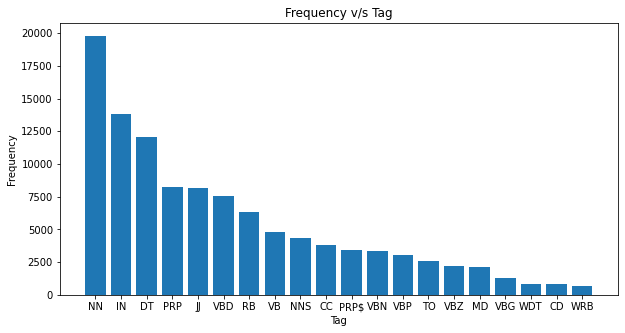

In [21]:
# Analyzing frequency of all the tags

tag_to_freq = {}

for tag in tagged_data:
    if(tag[1] in tag_to_freq):
        tag_to_freq[tag[1]] += 1
    else:
        tag_to_freq[tag[1]] = 1

tags = sorted(tag_to_freq.items(), key=lambda x: x[1], reverse=True)[:20]   # Displaying only 20 most frequent tags
x, y = zip(*tags)
plt.bar(x, y)
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.title("Frequency v/s Tag")
plt.show()
